In [37]:
with open(r'C:\Users\Zedd\Desktop\NLP practice\爬到的数据.txt',encoding='utf-8') as f:
    text = f.read()

In [43]:
jieba.cut(text)

<generator object Tokenizer.cut at 0x000001E8B518E8C8>

In [38]:
text = text.replace('\n',' ')

In [41]:
import jieba
text_jb = ' '.join(jieba.cut(text))
type(jieba.cut(text))

str

**<font size=4 color=blue>在wordcloud里设置stopwords参数感觉不太方便，最好在语料清洗的时候去掉停用词</font>**

---

**<font size=4 color=blue>京东评论爬取,list存储</font>**

In [1]:
import requests
import json
import time
import pymysql
import pandas as pd

In [2]:
#声明列表，以列表形式存储爬取到的数据
a = []

for page in range(0,100):   #循环爬取前{?}页
    url = 'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98&productId=100011977044&score=0&sortType=5&page={}&pageSize=10&isShadowSku=0&fold=1'.format(page) 
    header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36"}
    req = requests.get(url, headers=header)
    json_1 = req.text   #此处京东评论是放在json里的，其他情况是html较多
    py = json.loads(json_1.lstrip('fetchJSON_comment98vv12345(').rstrip(');'))   #解析json文件，将json文件转换为python字典，并将源码字典前面一大串不能解析的字符串去掉
    for i in py['comments']:   #py['comments']格式为列表list，里面是一个个字典dic，这里每一个i都是一个字典，i['id']取出的即是dic中key=‘id’对应的value，（列表中含有字典，用循环读取字典中的value）
        a.append(i['content'])   #将字段信息存储再list中
    print('第{}页爬取成功'.format(page))
    time.sleep(1)   #设置1s的延时访问
    
with open(r'C:\Users\Zedd\Desktop\NLP practice\jingdong data.txt', 'w', encoding='utf-8') as file:
    for i in a:
        file.write(i+'\n')
print('京东评论数据txt文件存储成功')

第0页爬取成功
第1页爬取成功
第2页爬取成功
第3页爬取成功
第4页爬取成功
第5页爬取成功
第6页爬取成功
第7页爬取成功
第8页爬取成功
第9页爬取成功
第10页爬取成功
第11页爬取成功
第12页爬取成功
第13页爬取成功
第14页爬取成功
第15页爬取成功
第16页爬取成功
第17页爬取成功
第18页爬取成功
第19页爬取成功
第20页爬取成功
第21页爬取成功
第22页爬取成功
第23页爬取成功
第24页爬取成功
第25页爬取成功
第26页爬取成功
第27页爬取成功
第28页爬取成功
第29页爬取成功
第30页爬取成功
第31页爬取成功
第32页爬取成功
第33页爬取成功
第34页爬取成功
第35页爬取成功
第36页爬取成功
第37页爬取成功
第38页爬取成功
第39页爬取成功
第40页爬取成功
第41页爬取成功
第42页爬取成功
第43页爬取成功
第44页爬取成功
第45页爬取成功
第46页爬取成功
第47页爬取成功
第48页爬取成功
第49页爬取成功
第50页爬取成功
第51页爬取成功
第52页爬取成功
第53页爬取成功
第54页爬取成功
第55页爬取成功
第56页爬取成功
第57页爬取成功
第58页爬取成功
第59页爬取成功
第60页爬取成功
第61页爬取成功
第62页爬取成功
第63页爬取成功
第64页爬取成功
第65页爬取成功
第66页爬取成功
第67页爬取成功
第68页爬取成功
第69页爬取成功
第70页爬取成功
第71页爬取成功
第72页爬取成功
第73页爬取成功
第74页爬取成功
第75页爬取成功
第76页爬取成功
第77页爬取成功
第78页爬取成功
第79页爬取成功
第80页爬取成功
第81页爬取成功
第82页爬取成功
第83页爬取成功
第84页爬取成功
第85页爬取成功
第86页爬取成功
第87页爬取成功
第88页爬取成功
第89页爬取成功
第90页爬取成功
第91页爬取成功
第92页爬取成功
第93页爬取成功
第94页爬取成功
第95页爬取成功
第96页爬取成功
第97页爬取成功
第98页爬取成功
第99页爬取成功
京东评论数据txt文件存储成功


---

**<font size=4 color=blue>中文分词，去停用词，tf-idf统计学算法提取关键词，词云展示</font>**

In [3]:
import pandas as pd
import numpy as np
import wordcloud
from wordcloud import WordCloud
import jieba
import jieba.analyse as anls
from imageio import imread
import matplotlib.pyplot as plt

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Zedd\AppData\Local\Temp\jieba.cache
Loading model cost 0.638 seconds.
Prefix dict has been built successfully.


Populating the interactive namespace from numpy and matplotlib


D:\Softwares Installed\Anaconda\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


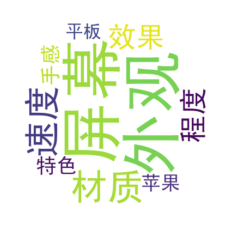

In [5]:
#分词
#sep_text_list = []
def separate(sentence):   #输入为整段文本，输出为str，后传入wordcloud
    sep_text = jieba.cut(sentence.strip())   #去除文本首尾空格
    stopword = stopwords()
    sep_text_str = ''
    for word in sep_text:
        if word not in stopword:
            #sep_text_list.append(word)    sep_text_str = ' '.join(sep_text_list)  list直接转化为str
            sep_text_str += word
            sep_text_str += ' '
    return sep_text_str

#加载停用词表
def stopwords():
    stopword = [line.strip() for line in open(r'C:\Users\Zedd\Desktop\stopwords-master\cn_stopwords.txt', encoding='UTF-8').readlines()]  # list类型
    return stopword

#基于tf-idf提取关键词  
def tf_idf_extract(sentence):
    keywords = []
    tfidf = anls.extract_tags(sentence, topK=10, withWeight=False, allowPOS=('n'))   #allowPOS为设置指定词性 'n'为noun
    for word in tfidf:
        keywords.append(word)
    keywords = ' '.join(keywords)
    return keywords
    
#画词云
def show_and_save_wordcloud(strr):   #wordcloud函数的输入为【分词后用空格join的str】
    mk = imread(r'C:\Users\Zedd\Desktop\NLP practice\circle.jpg')
    fontpath = r"D:\Softwares Installed\Anaconda\anaconda\Lib\site-packages\wordcloud\SimHei.ttf"
    wc = WordCloud(font_path = fontpath,background_color = 'white',width=3000,height=2000,mask = mk).generate(strr)
    %pylab inline
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    wc.to_file(r'C:\Users\Zedd\Desktop\NLP practice\wordcloud.jpg')
    
#main()
def main():
    with open(r'C:\Users\Zedd\Desktop\NLP practice\jingdong data.txt',encoding='utf-8') as f:
        text = f.read()
    text = text.replace('\n',' ')
    sep_str = separate(text)
    tfidf_str = tf_idf_extract(sep_str)
    show_and_save_wordcloud(tfidf_str)

#执行
main()

In [1]:
a = '1bc ejk kjn'
a.split(' ')[1]

'ejk'

**<font size=4 color=blue>用word2vector深度学习模型训练获得词向量</font>**

In [ ]:
from gensim import word2vec
import logging

def train_w2v():   #训练word2vector
    logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)   #配置日志文件
    sentence = word2vec.Text8Corpus(r'')   #加载语料库
    model = word2vec.Word2Vec(sentence, sg=1, size=100, window=5, min_count=1, negative=3, sample=0.001, hs=1, workers=40)   #训练skip-gram(sg=1)模型
    # model.save(r'')   #保存模型
    # model = word2vec.Word2Vec.load(r'')   # 对应的加载方式
    
def get_w2v(wordlist):   #获取词向量
    # model = word2vec.Word2Vec.load(r'') 加载模型
    vecs =[]
    for word in wordlist:
        word = word.replace('\n','')
        vecs.append(model[word])
    return vecs

word2vec.Word2Vec()
- sg=1是skip—gram算法，对低频词敏感，默认sg=0为CBOW算法
- size是神经网络层数（词向量维度），值太大则会耗内存并使算法计算变慢，一般值取为100到200之间。
- window是句子中当前词与目标词之间的最大距离，3表示在目标词前看3-b个词，后面看b个词（b在0-3之间随机）
- min_count是对词进行过滤，频率小于min-count的单词则会被忽视，默认值为5。
- negative和sample可根据训练结果进行微调，sample表示更高频率的词被随机下采样到所设置的阈值，默认值为1e-3,
- negative: 如果>0,则会采用negativesamping，用于设置多少个noise words
- hs=1表示层级softmax将会被使用，默认hs=0且negative不为0，则负采样将会被选择使用。
- workers是线程数，此参数只有在安装了Cpython后才有效，否则只能使用单核

**<font size=4 color=blue>用snownlp进行情感分析（朴素贝叶斯）</font>**

In [2]:
from snownlp import SnowNLP

In [9]:
text = '昨天刚上手，先玩一段再来评论'
s = SnowNLP(text)

In [11]:
type(s.sentiments)

float

In [22]:
import pandas as pd
text = pd.read_csv(r'C:\Users\Zedd\Desktop\NLP practice\jingdong data.txt', header=None, sep='\t')
text.head()

,0
0,做工非常精细，用料考究，关键还与时俱进地用了usb-c的接口，充电和传输文件就方便多了，屏幕...
1,外观材质：手感细腻，铝感明显，还是需要加个套，防滑安全。
2,屏幕效果：屏幕分辨率不错，从ipad mini3来的，刚觉瞬间秒杀，看电视办公都不错，11寸...
3,运行速度：最快ipad，系统流畅，真香，用个3-4年没问题。
4,轻薄程度：全面屏，超薄，最好平板


In [23]:
text.rename(columns={0:'comment'},inplace=True)
text.head()

,comment
0,做工非常精细，用料考究，关键还与时俱进地用了usb-c的接口，充电和传输文件就方便多了，屏幕...
1,外观材质：手感细腻，铝感明显，还是需要加个套，防滑安全。
2,屏幕效果：屏幕分辨率不错，从ipad mini3来的，刚觉瞬间秒杀，看电视办公都不错，11寸...
3,运行速度：最快ipad，系统流畅，真香，用个3-4年没问题。
4,轻薄程度：全面屏，超薄，最好平板


In [24]:
def get_sentiment(sentence):
    s = SnowNLP(sentence)
    return s.sentiments
text['sentiment']=text.comment.apply(get_sentiment)
text.head()

,comment,sentiment
0,做工非常精细，用料考究，关键还与时俱进地用了usb-c的接口，充电和传输文件就方便多了，屏幕...,1.000000
1,外观材质：手感细腻，铝感明显，还是需要加个套，防滑安全。,0.998992
2,屏幕效果：屏幕分辨率不错，从ipad mini3来的，刚觉瞬间秒杀，看电视办公都不错，11寸...,0.999676
3,运行速度：最快ipad，系统流畅，真香，用个3-4年没问题。,0.993141
4,轻薄程度：全面屏，超薄，最好平板,0.997760


In [27]:
import matplotlib as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

<AxesSubplot:ylabel='sentiment'>

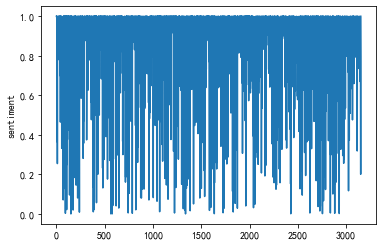

In [33]:
import seaborn as sns
sns.lineplot(x=text.index,y='sentiment',data=text)

In [31]:
text.sentiment.sort_values()

150     0.000020
577     0.000216
1337    0.000301
563     0.000456
2427    0.000764
          ...   
233     1.000000
1204    1.000000
45      1.000000
545     1.000000
0       1.000000
Name: sentiment, Length: 3153, dtype: float64